# Dataset Culler

#### Used to create a new dataset by culling the current dataset down to a specific sample size

In [1]:
from datetime import datetime
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *
import fastai

import os
import shutil




CHOSEN_SAMPLE_SIZE = 160  #use this to control per-category sample sizes # 1000


orig_dir = 'fdoororange'
culled_dir = f'{orig_dir}_culled_{CHOSEN_SAMPLE_SIZE}'

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 120
plt.style.use('dark_background')



In [2]:
# path = '../data/external/Training_Set'
path = f'../../data/{orig_dir}'
# path2 = '../data/frank-ledlights-L'
culled_path = f'../../data/{culled_dir}/Training_Set'

os.makedirs(culled_path, exist_ok=True)  # stop execution if dest dir exists

<br>
<br>

### Check for Dataset Imbalance

In [3]:
from string import ascii_uppercase
import numpy as np
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


image_files = {}
image_files_qty = {}

# loop through all the characters to build dictionaries of image files and quartity of each category
for c, i in zip(ascii_uppercase, np.arange(len(ascii_uppercase))):
    image_files[c] = get_image_files(path + f'/{c}')
#     print(path + f'/{c}')
    l = len(image_files[c])
    image_files_qty[c] = l
    
# custom code since we don't use 'Z'
image_files.pop('J')
image_files_qty.pop('J')
image_files.pop('Z')
image_files_qty.pop('Z')

# Get the character with the largest and smallest number of entries
maxqc = max(image_files_qty, key=image_files_qty.get)
minqc = min(image_files_qty, key=image_files_qty.get)


print()
print(f'Character with the most images:   {maxqc},   with {image_files_qty[maxqc]} images')
print(f'Character with the least images:  {minqc},   with {image_files_qty[minqc]} images')
print(f'Average number of images:         {round(np.mean(list(image_files_qty.values())))}')




Character with the most images:   D,   with 555 images
Character with the least images:  C,   with 160 images
Average number of images:         248


<br>
<br>

## Display the number of image files for each category

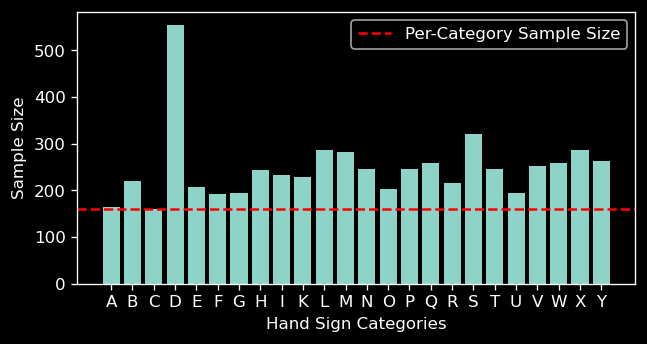

In [4]:
# plt.hist(image_files_qty.items)
plt.figure(figsize=(6,3))
plt.bar(image_files_qty.keys(), image_files_qty.values())
plt.axhline(CHOSEN_SAMPLE_SIZE, ls='--', color='r', label='Per-Category Sample Size')
plt.xlabel('Hand Sign Categories')
plt.ylabel('Sample Size')
plt.legend();

In [5]:
import pandas as pd
import os

maxq = image_files_qty[maxqc] # the quantity of the largest category
minq = image_files_qty[minqc] # the quantity of the smallest category

# all_image_files = pd.DataFrame(columns=[0])  # holds all the image files in one dataframe
culled_image_files = {}

for char, q in iter(image_files_qty.items()):
#     if char != 'O': continue
    df = pd.DataFrame(data=list(image_files[char]), columns=[0])  # create a dataframe from each list
    

    # undersample or over sample as needed
    if len(df) >= CHOSEN_SAMPLE_SIZE:
        df = df.sample(CHOSEN_SAMPLE_SIZE, replace=False)  # undersample
    else:
        delta = CHOSEN_SAMPLE_SIZE - len(df)
        df = pd.concat([df, df.sample(delta, replace=False)], ignore_index=True)  # oversample
        
    os.makedirs(f'{culled_path}/{char}', exist_ok=True)

    for f in df[0]: 
        if os.path.isfile(f'{culled_path}/{char}/{str(f).split("/")[-1]}'):
#             print('isfile')
            shutil.copyfile(f, f'{culled_path}/{char}/_{str(f).split("/")[-1]}')
        else:
            shutil.copyfile(f, f'{culled_path}/{char}/{str(f).split("/")[-1]}')
